In [3]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

# Metodo con il contesto `with` (raccomandato)
file_path = "/home/acarugat/DiscorsoMattarellaFine2024.txt"

# Leggi il contenuto del file
with open(file_path, 'r', encoding='utf-8') as file:
    testo = file.read()

#print(testo)  # Stampa il contenuto del file

# Pulizia del testo
stop_words = set(stopwords.words('italian'))
tokens = word_tokenize(testo.lower())
tokens_puliti = [word for word in tokens if word not in stop_words and word not in string.punctuation]

#print(tokens_puliti)


In [4]:
from gensim.models import Word2Vec

# Addestramento di Word2Vec
model = Word2Vec([tokens_puliti], vector_size=100, window=5, min_count=3, max_vocab_size=100, workers=4)
print (model)

# Salva il modello
model.save("word2vec_model")


Word2Vec<vocab=56, vector_size=100, alpha=0.025>


In [5]:
# Parole simili
parole_simili = model.wv.most_similar('pace', topn=5)
print(parole_simili)


[('valori', 0.18433897197246552), ('spesso', 0.1711086630821228), ('comune', 0.15790283679962158), ('speranza', 0.13311634957790375), ('forza', 0.09916076809167862)]


In [6]:
# Ottieni le parole nel vocabolario e le loro frequenze
parole = model.wv.index_to_key[:100]  # Prime 100 parole più frequenti

# Stampa le parole con le loro frequenze
print("Parola - Frequenza")
for parola in parole:
    frequenza = model.wv.get_vecattr(parola, "count")  # Frequenza della parola
    print(f"{parola} - {frequenza}")


# Ottieni i vettori corrispondenti
vettori = [model.wv[word] for word in parole]

Parola - Frequenza
’ - 49
anno - 10
italia - 9
pace - 8
vita - 6
speranza - 6
altri - 6
comunità - 6
tempo - 5
mondo - 5
condizioni - 5
libertà - 5
tanti - 5
rispetto - 5
valori - 5
società - 4
costituzione - 4
dignità - 4
natale - 4
realtà - 4
persone - 4
possono - 4
paese - 4
giovani - 4
essere - 4
attesa - 4
sicurezza - 4
ore - 4
lavoro - 4
ogni - 4
guerre - 3
notte - 3
diritti - 3
vittime - 3
paesi - 3
cittadini - 3
spesso - 3
d - 3
ragazzi - 3
bene - 3
vogliamo - 3
donne - 3
responsabilità - 3
fa - 3
verso - 3
comune - 3
vanno - 3
quindi - 3
dati - 3
forza - 3
oltre - 3
futuro - 3
servizio - 3
repubblica - 3
primo - 3
concittadini - 3


In [7]:
import numpy as np

def vettore_medio(parole, modello):
    vettori = [modello.wv[word] for word in parole if word in modello.wv]
    return np.mean(vettori, axis=0) if vettori else np.zeros(modelo.vector_size)

# Calcola il vettore medio per un documento
vettore_doc = vettore_medio(tokens_puliti, model)


56


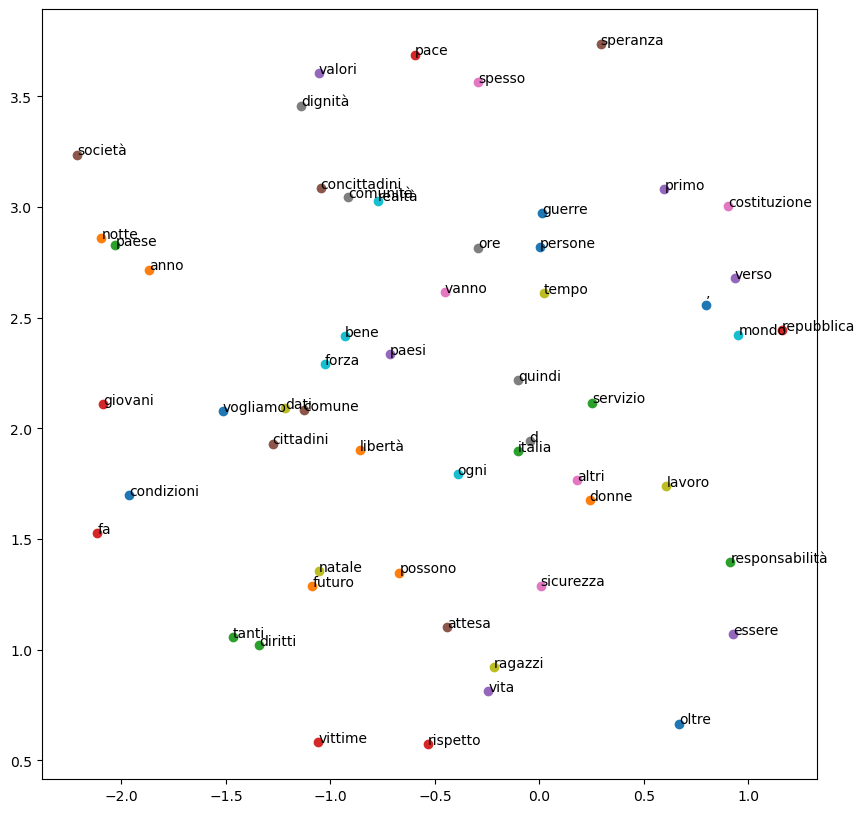

In [8]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Riduzione dimensionale
vettori = model.wv[model.wv.index_to_key]
print(len(model.wv.index_to_key))
tsne = TSNE(n_components=2, random_state=0)

vettori_ridotti = tsne.fit_transform(vettori)

# Visualizzazione
plt.figure(figsize=(10, 10))
for i, word in enumerate(model.wv.index_to_key):
    plt.scatter(vettori_ridotti[i, 0], vettori_ridotti[i, 1])
    plt.annotate(word, (vettori_ridotti[i, 0], vettori_ridotti[i, 1]))
plt.show()


In [9]:
from sklearn.cluster import KMeans

# Imposta il numero di cluster
num_clusters = 10

# Esegui il clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
kmeans.fit(vettori)

# Ottieni i cluster
clusters = kmeans.labels_


/home/acarugat/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [10]:
# Raggruppa le parole per cluster
cluster_parole = {i: [] for i in range(num_clusters)}
for parola, cluster in zip(parole, clusters):
    cluster_parole[cluster].append(parola)

# Visualizza i cluster
for cluster, parole in cluster_parole.items():
    print(f"Cluster {cluster}: {parole}")


Cluster 0: ['tempo', 'valori', 'dignità', 'sicurezza', 'ogni', 'vanno', 'quindi', 'concittadini']
Cluster 1: ['rispetto', 'possono', 'giovani', 'attesa', 'ragazzi']
Cluster 2: ['diritti', 'vittime', 'responsabilità', 'futuro']
Cluster 3: ['condizioni', 'cittadini', 'vogliamo', 'comune', 'dati', 'forza', 'servizio']
Cluster 4: ['’', 'mondo', 'costituzione', 'lavoro', 'repubblica']
Cluster 5: ['pace', 'natale', 'realtà', 'paesi', 'bene', 'fa', 'oltre', 'primo']
Cluster 6: ['vita', 'speranza', 'libertà', 'persone', 'ore', 'guerre', 'spesso']
Cluster 7: ['altri', 'comunità', 'tanti', 'd', 'verso']
Cluster 8: ['anno', 'società', 'paese', 'notte']
Cluster 9: ['italia', 'essere', 'donne']


Cluster 0: ['tempo', 'valori', 'dignità', 'sicurezza', 'ogni', 'vanno', 'quindi', 'concittadini']


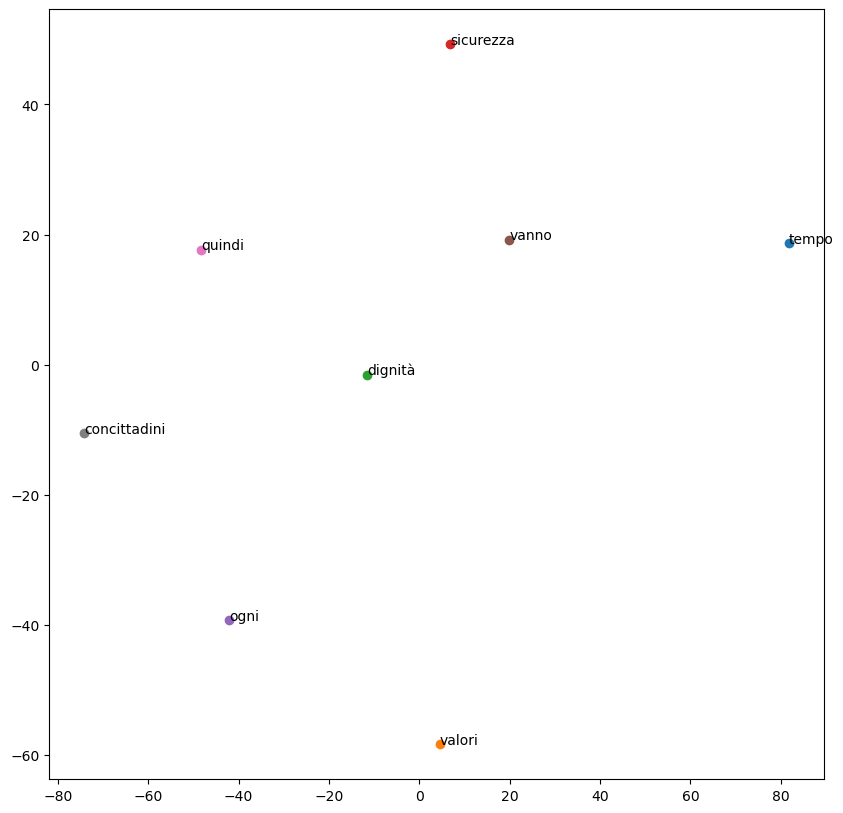

Cluster 1: ['rispetto', 'possono', 'giovani', 'attesa', 'ragazzi']


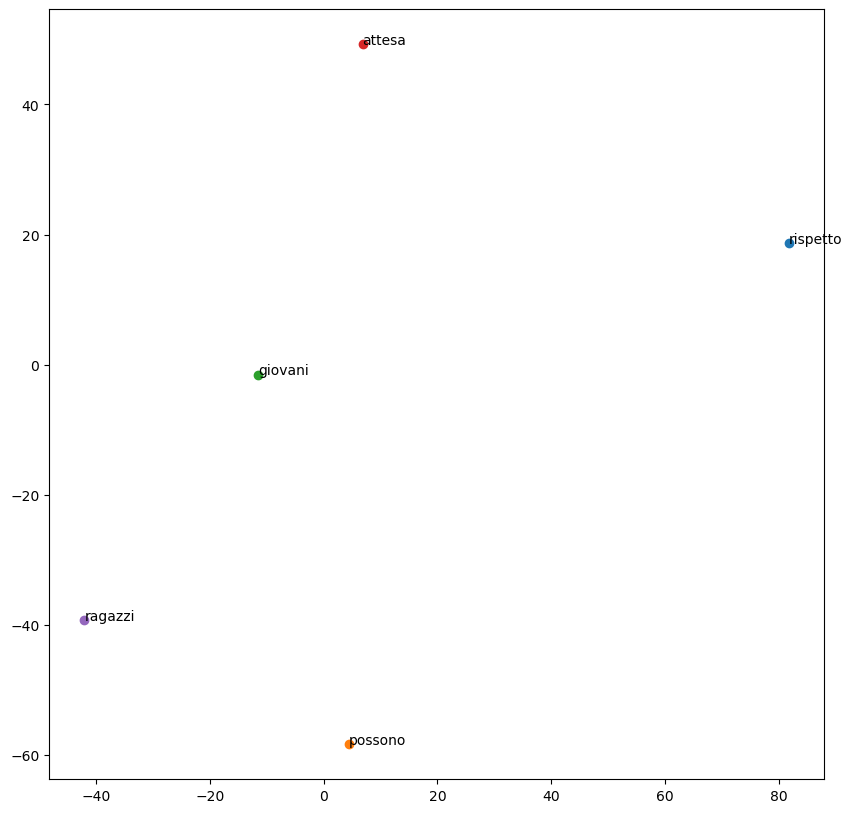

Cluster 2: ['diritti', 'vittime', 'responsabilità', 'futuro']


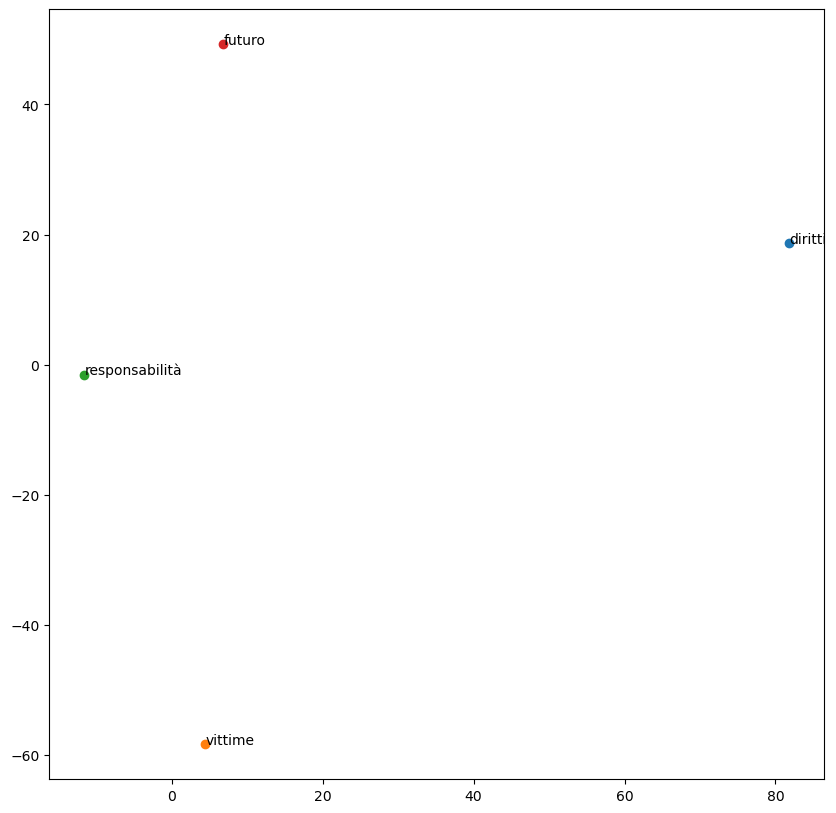

Cluster 3: ['condizioni', 'cittadini', 'vogliamo', 'comune', 'dati', 'forza', 'servizio']


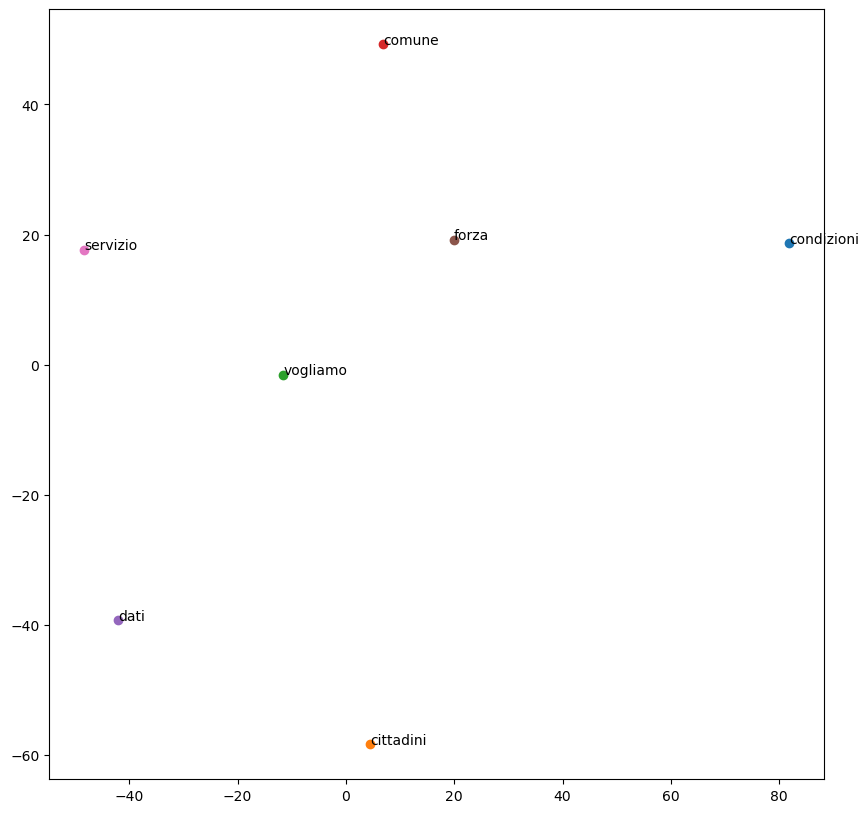

Cluster 4: ['’', 'mondo', 'costituzione', 'lavoro', 'repubblica']


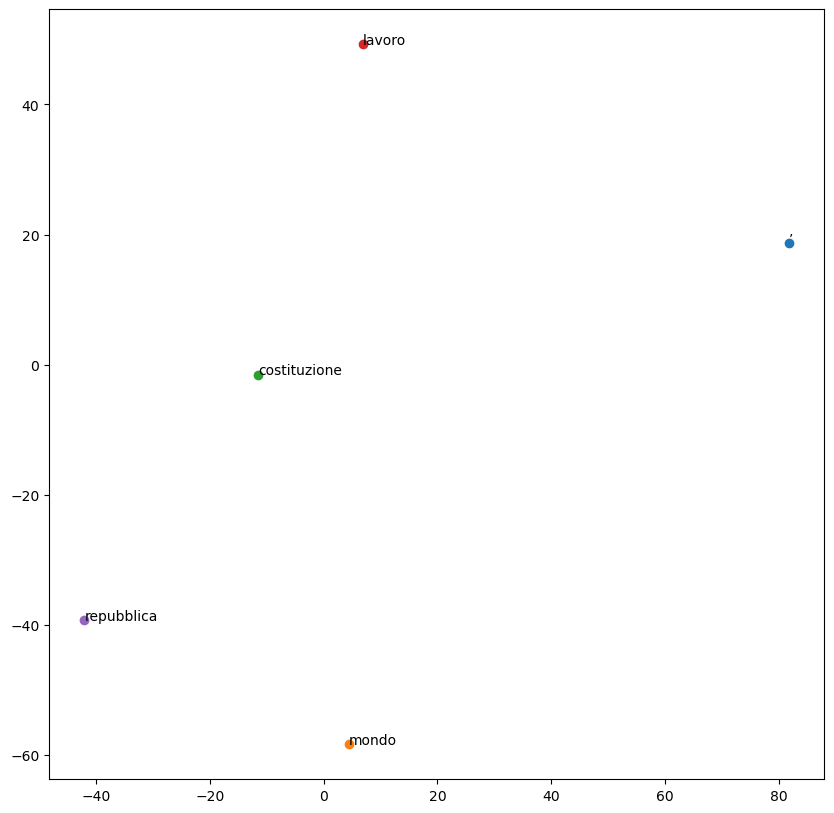

Cluster 5: ['pace', 'natale', 'realtà', 'paesi', 'bene', 'fa', 'oltre', 'primo']


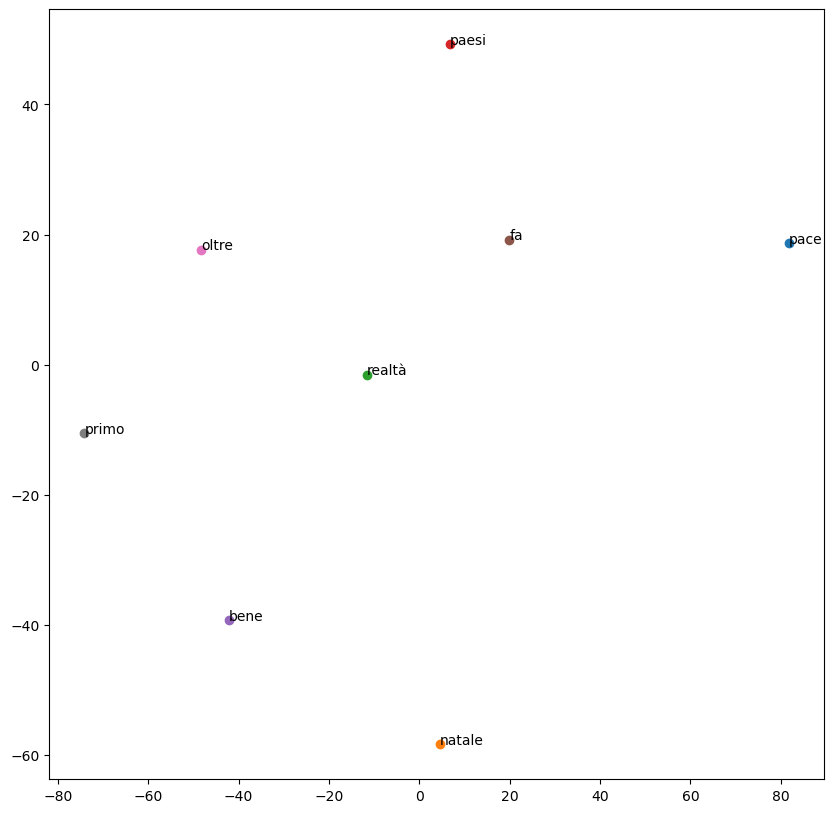

Cluster 6: ['vita', 'speranza', 'libertà', 'persone', 'ore', 'guerre', 'spesso']


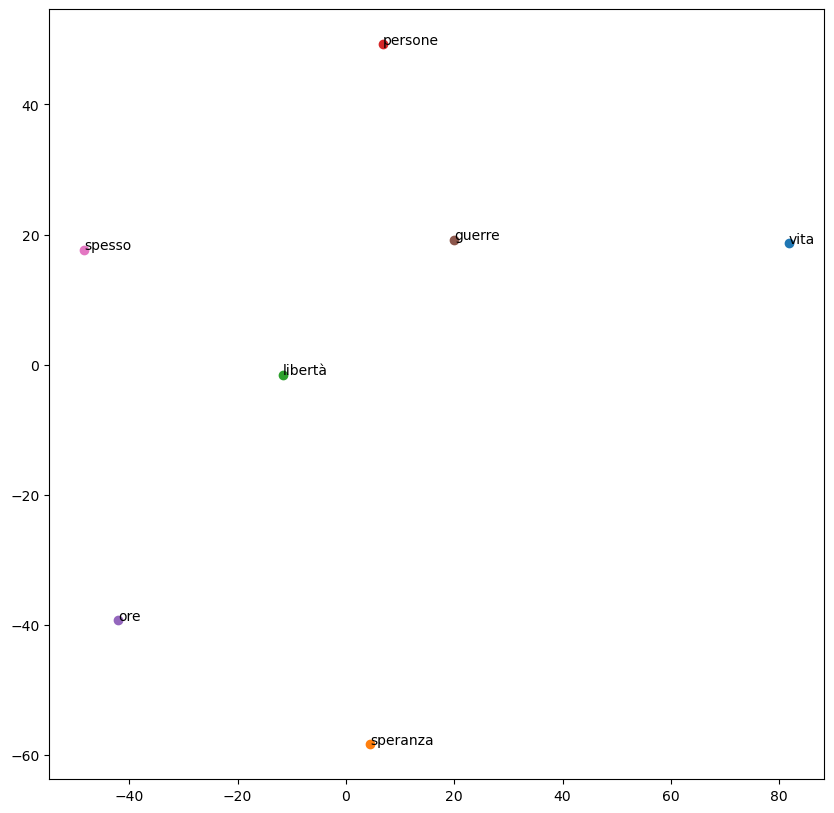

Cluster 7: ['altri', 'comunità', 'tanti', 'd', 'verso']


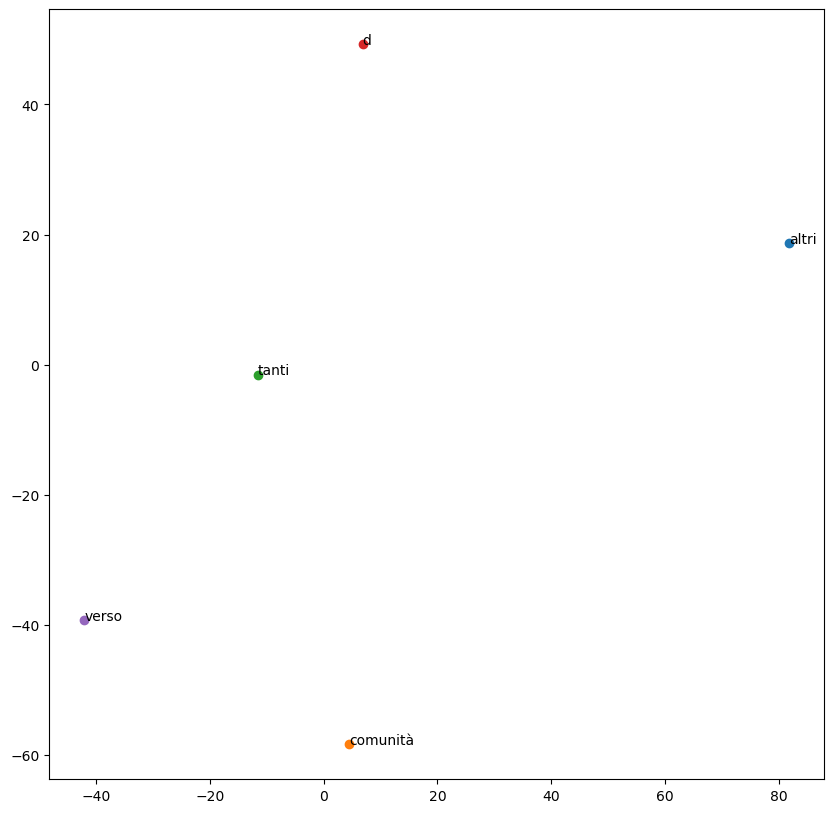

Cluster 8: ['anno', 'società', 'paese', 'notte']


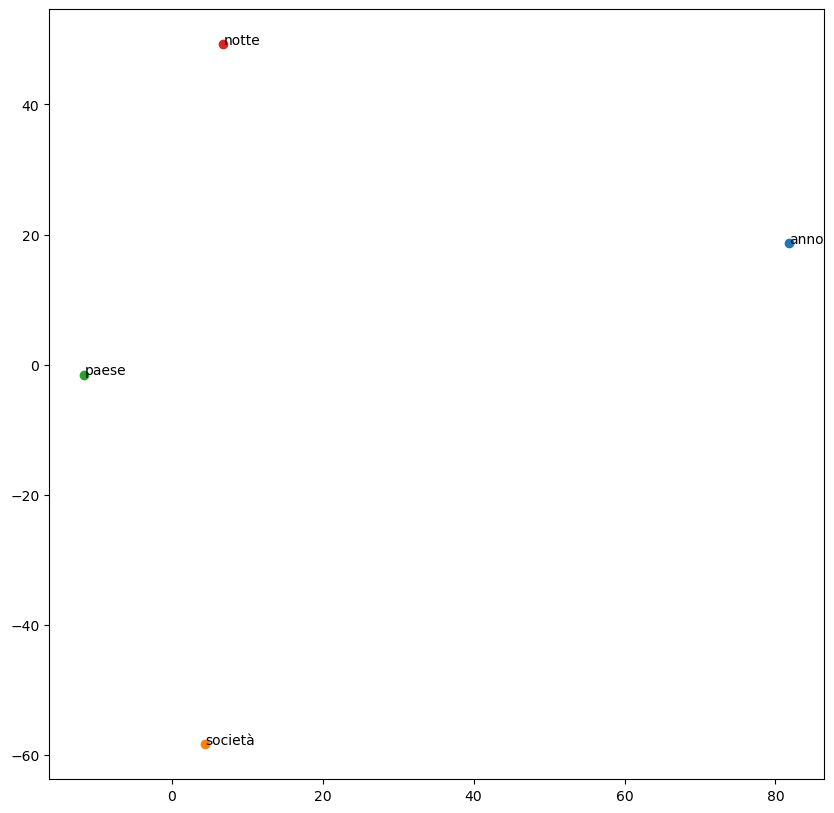

Cluster 9: ['italia', 'essere', 'donne']


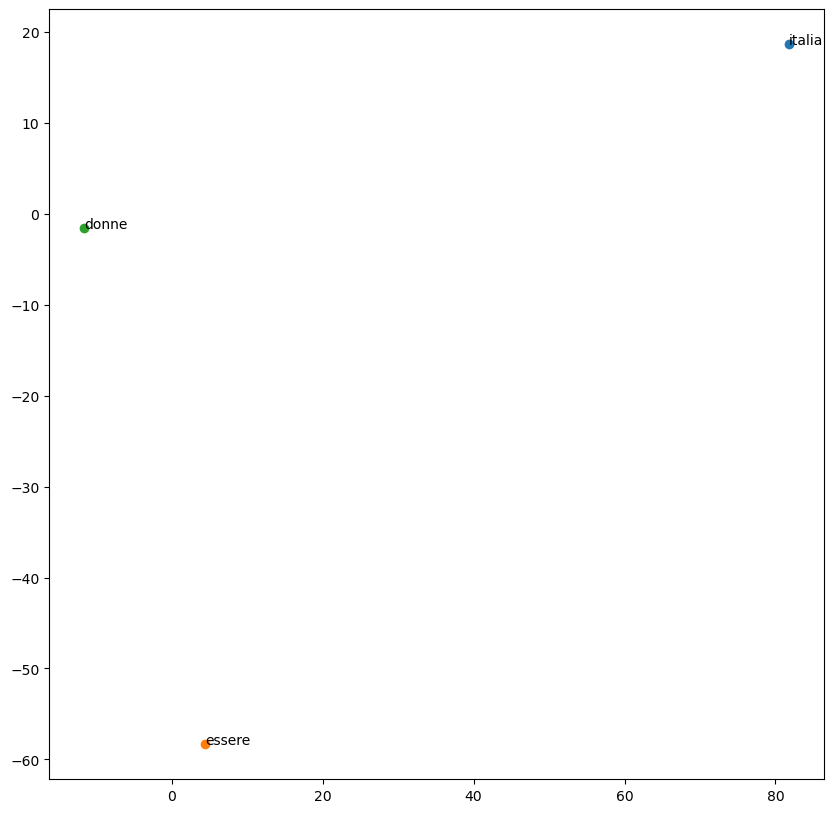

In [11]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Converti i vettori in un array NumPy
vettori_array = np.array(vettori)

# Riduzione dimensionale con t-SNE
tsne = TSNE(n_components=2, perplexity=5, random_state=0)
vettori_ridotti = tsne.fit_transform(vettori_array)

# Visualizzazione
for cluster, parole in cluster_parole.items():
    print(f"Cluster {cluster}: {parole}")
    plt.figure(figsize=(10, 10))
    for i, parola in enumerate(parole):
        plt.scatter(vettori_ridotti[i, 0], vettori_ridotti[i, 1])
        plt.annotate(parola, (vettori_ridotti[i, 0], vettori_ridotti[i, 1]))
    plt.show()


In [12]:
import nltk

# Scarica le risorse necessarie
nltk.download('punkt')

# Tokenizza il testo in frasi
frasi = nltk.sent_tokenize(testo, language="italian")

# Stampa le lunghezze delle frasi
print("Lunghezze delle frasi:")
for frase in frasi:
    parole = nltk.word_tokenize(frase, language="italian")
    print(f"Frase: '{frase.strip()}' -> Lunghezza: {len(parole)} parole")

Lunghezze delle frasi:
Frase: 'Care concittadine e cari concittadini,

questo nostro incontro tradizionale mi consente di rivolgere l’augurio più sincero a tutti voi, a chi si trova in Italia e agli italiani che sono all’estero.' -> Lunghezza: 38 parole
Frase: 'Stiamo vivendo come ogni fine anno ore di attesa per un tempo nuovo che viene e che speriamo migliore.' -> Lunghezza: 20 parole
Frase: 'Ore in cui cerchiamo la serenità rinsaldando i nostri rapporti.' -> Lunghezza: 11 parole
Frase: 'Nelle nostre comunità, nelle famiglie, nelle amicizie.' -> Lunghezza: 10 parole
Frase: 'Facciamo i nostri auguri e ne riceviamo.' -> Lunghezza: 8 parole
Frase: 'Non è soltanto un rito, è la dimostrazione della nostra natura più autentica, quella che ci chiama alla relazione con gli altri.' -> Lunghezza: 25 parole
Frase: 'Lo facciamo, dobbiamo farlo tanto più in quanto viviamo momenti difficili.' -> Lunghezza: 13 parole
Frase: 'Quando migliaia di vittime civili delle guerre in corso turbano tragicamen

[nltk_data] Downloading package punkt to /home/acarugat/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
